## Importing Libraries

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data

In [202]:
data = pd.read_csv('Data/Graduate Admission.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,0.92,1
1,2,324,107,4,4.0,4.5,8.87,0.76,1
2,3,316,104,3,3.0,3.5,8.00,0.72,1
3,4,322,110,3,3.5,2.5,8.67,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0.65,0


In [203]:
data.shape

(400, 9)

### Checking for Null Values

In [204]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admit                0
dtype: int64

### Dropping irrelevant Columns

In [205]:
data.drop(columns = ['Serial No.'], axis = 1, inplace = True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,0.92,1
1,324,107,4,4.0,4.5,8.87,0.76,1
2,316,104,3,3.0,3.5,8.00,0.72,1
3,322,110,3,3.5,2.5,8.67,0.80,1
4,314,103,2,2.0,3.0,8.21,0.65,0


## Data Visualisation

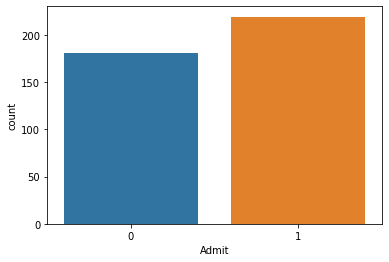

In [206]:
sns.countplot(x = 'Admit', data = data)

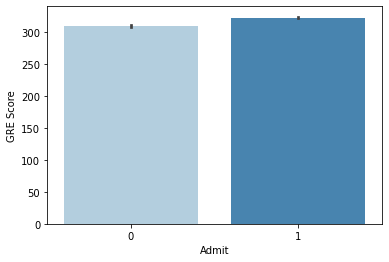

In [207]:
sns.barplot(x = 'Admit', y = 'GRE Score', data = data, palette = 'Blues')

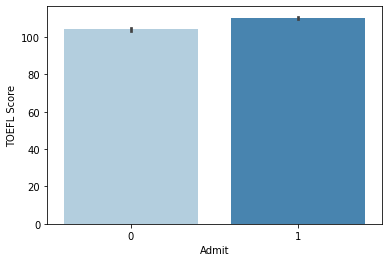

In [208]:
sns.barplot(x = 'Admit', y = 'TOEFL Score', data = data, palette = 'Blues')

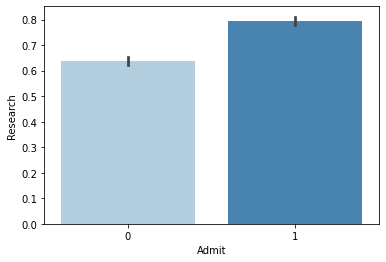

In [209]:
sns.barplot(x = 'Admit', y = 'Research', data = data, palette = 'Blues')

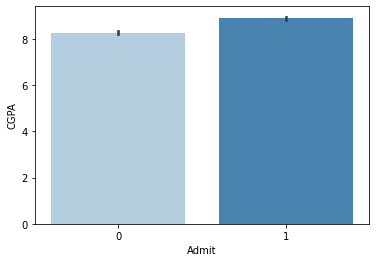

In [210]:
sns.barplot(x = 'Admit', y = 'CGPA', data = data, palette = 'Blues')

## Checking for Out-Liers in data

In [211]:
focus1 = data[data['Admit'] == 1]
focus0 = data[data['Admit'] == 0]

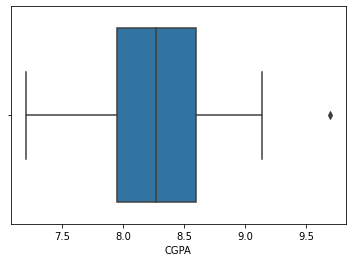

In [212]:
sns.boxplot(x = 'CGPA', data = focus0)

theres one out-lier which needs to be treated

In [213]:
focus0[focus0['CGPA'] == focus0['CGPA'].max()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
47,339,119,5,4.5,4.0,9.7,0.89,0


In [214]:
data.drop([47], inplace = True)

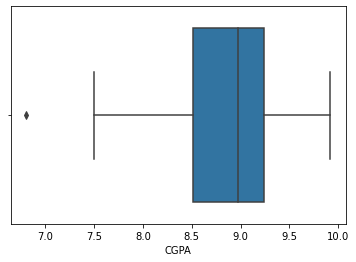

In [215]:
sns.boxplot(x = 'CGPA', data = focus1)

there is a out-lier in the lower spectrum of the CGPA as well

In [216]:
focus1[focus1['CGPA'] == focus1['CGPA'].min()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
58,300,99,1,3.0,2.0,6.8,0.36,1


In [217]:
data.drop([58], inplace = True)

In [218]:
data.shape

(398, 8)

### Checking for outliers in Research

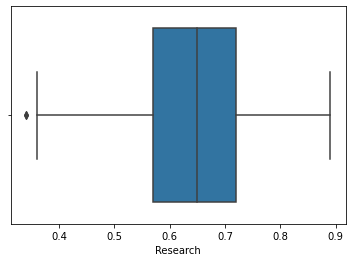

In [219]:
sns.boxplot(x = 'Research', data = focus0)

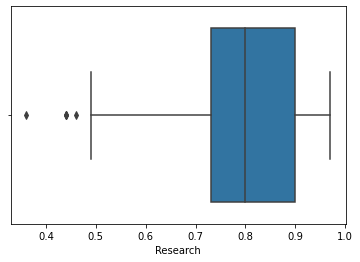

In [220]:
sns.boxplot(x = 'Research', data = focus1)

these 3 outliers have to be treated

In [221]:
focus1[focus1['Research'] < 0.5]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
27,298,98,2,1.5,2.5,7.50,0.44,1
40,308,110,3,3.5,3.0,8.00,0.46,1
41,316,105,2,2.5,2.5,8.20,0.49,1
58,300,99,1,3.0,2.0,6.80,0.36,1
78,296,95,2,3.0,2.0,7.54,0.44,1
93,301,97,2,3.0,3.0,7.88,0.44,1


removing 3 least data points from this

In [222]:
data.drop([27,40,78,93],inplace = True)

In [223]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,0.92,1
1,324,107,4,4.0,4.5,8.87,0.76,1
2,316,104,3,3.0,3.5,8.00,0.72,1
3,322,110,3,3.5,2.5,8.67,0.80,1
4,314,103,2,2.0,3.0,8.21,0.65,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,0.82,1
396,325,107,3,3.0,3.5,9.11,0.84,1
397,330,116,4,5.0,4.5,9.45,0.91,1
398,312,103,3,3.5,4.0,8.78,0.67,0


## Checking Correlation and Predicting Values

In [224]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
GRE Score,1.000000,0.831724,0.661737,0.610357,0.549056,0.828548,0.797496,0.617238
TOEFL Score,0.831724,1.000000,0.689517,0.657130,0.560952,0.826875,0.790826,0.523075
University Rating,0.661737,0.689517,1.000000,0.734723,0.655682,0.741571,0.708737,0.471688
SOP,0.610357,0.657130,0.734723,1.000000,0.730737,0.723093,0.681660,0.459972
LOR,0.549056,0.560952,0.655682,0.730737,1.000000,0.664274,0.665015,0.417316
CGPA,0.828548,0.826875,0.741571,0.723093,0.664274,1.000000,0.868501,0.566307
Research,0.797496,0.790826,0.708737,0.681660,0.665015,0.868501,1.000000,0.602150
Admit,0.617238,0.523075,0.471688,0.459972,0.417316,0.566307,0.602150,1.000000


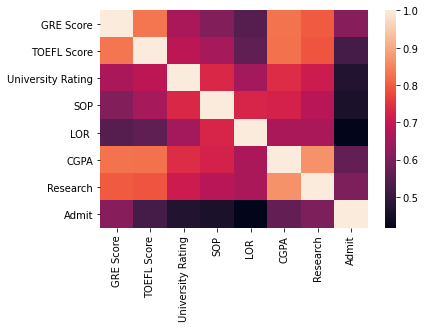

In [225]:
sns.heatmap(data.corr())

We see LOR and SOP doesn't really contribute to the Admit of the student

In [227]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admit'],
      dtype='object')

## Importing Sci-Kit Learn Library functions

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [242]:
x = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y = data['Admit']

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [247]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(x_train, y_train)

c:\users\subha\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [248]:
y_pred = logistic_regressor.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logistic_regressor.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.818182


# Accuracy of the Model is 81.8182 %